In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\prksh\Downloads\adease_data\train_1.csv")
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking Out the Null values

In [3]:
print(df.isna().sum())
null_counts = df.isna().sum().reset_index().drop(0)
null_counts.columns = ['Date', 'null_counts']

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64


In [4]:
null_counts.set_index('Date', inplace=True)

Text(0, 0.5, 'No. of null values')

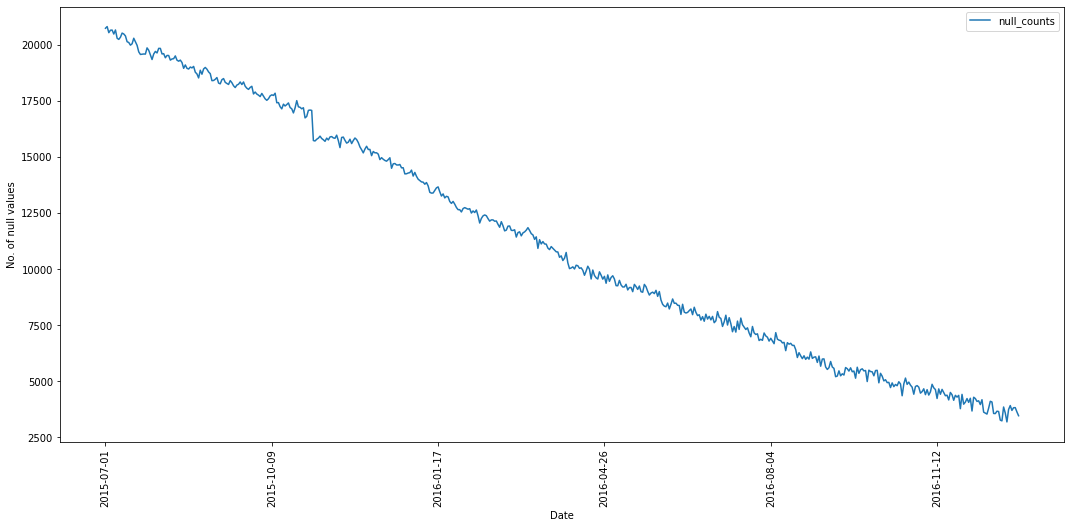

In [5]:

null_counts.plot(figsize=(18,8));
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("No. of null values")

It is clear from the plot that the null values decreases by the date, this may be due the fact that a lot of pages were released/launched after a certain date. This may not need treatment as this indicates the actual situation with the data and business rather than an anamoly. And as we will be aggregating the data based on languages the null values would be not be considered.

## EDA

Preprocesing

In [10]:
import re

strings = df['Page'].to_list()

# language flag extraction
regex = r'_(\w{2})\.wikipedia\.or'

language_flags = []
for string in strings:
    match = re.search(regex, string)
    if match:
        language_flags.append(match.group(1))
    else:
        language_flags.append("others")

print(f'Labelled Results\tTotal articles\n{len(language_flags)}\t\t\t{len(strings)}')
print(f'{np.unique(language_flags, return_counts=True)[0]}\n{np.unique(language_flags, return_counts=True)[1]}')

Labelled Results	Total articles
145063			145063
['de' 'en' 'es' 'fr' 'ja' 'others' 'ru' 'zh']
[18547 24108 14069 17802 20431 17855 15022 17229]


In [11]:
df['lang_flags'] = language_flags
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,lang_flags
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,zh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0,es
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es


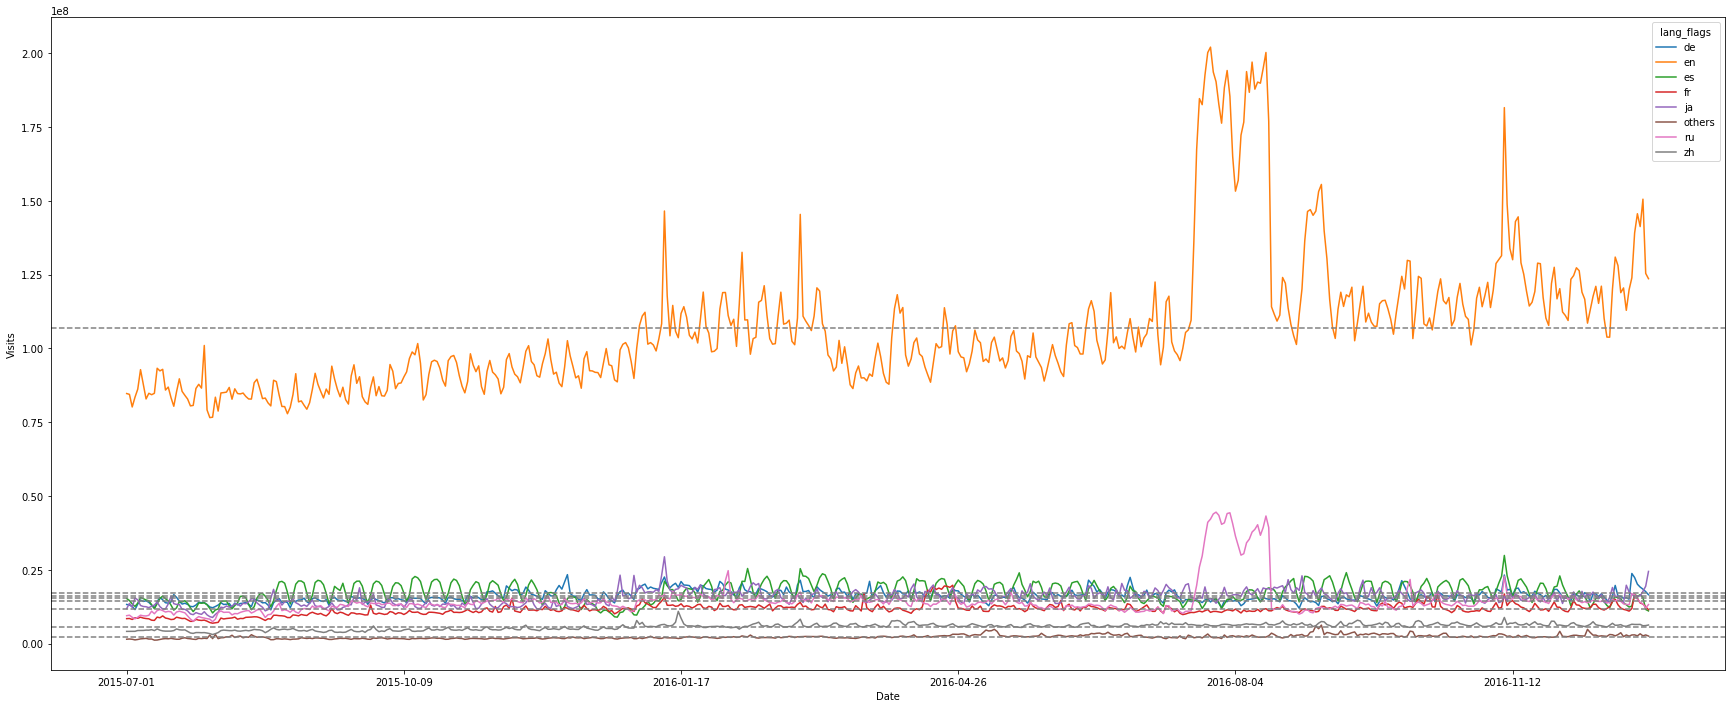

In [24]:
l_df_sum = df.groupby('lang_flags').sum().T
l_df_sum.plot(figsize=(30,12));
plt.xlabel('Date')
plt.ylabel('Visits')

for i in l_df_sum.columns:
    plt.axhline(l_df_sum[i].mean(), color='grey', linestyle='--')

English beats other languages by a huge margin of total visits

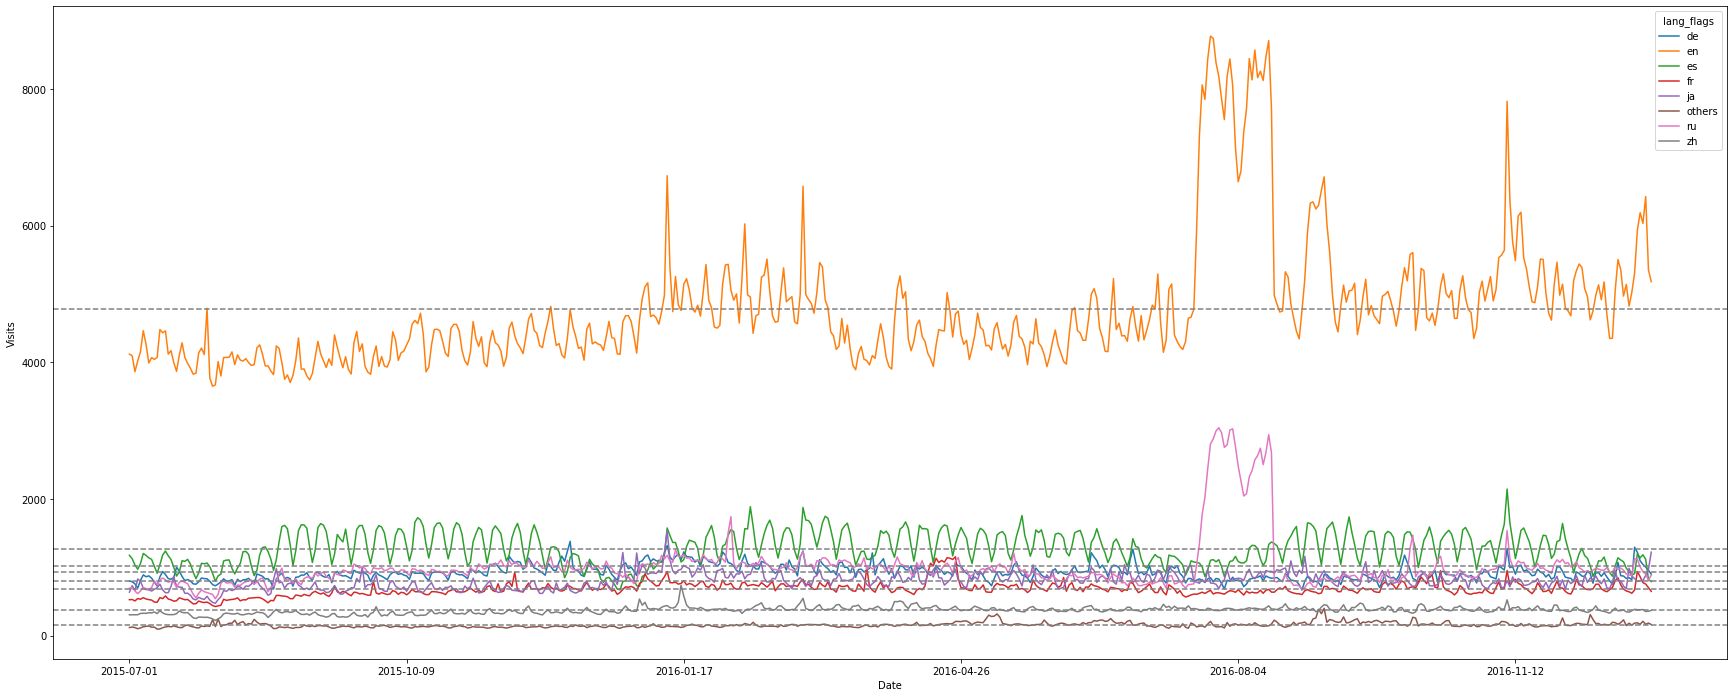

In [27]:
l_df_avg = df.groupby('lang_flags').mean().T
l_df_avg.plot(figsize=(30,12));
plt.xlabel('Date')
plt.ylabel('Visits')

for i in l_df_avg.columns:
    plt.axhline(l_df_avg[i].mean(), color='grey', linestyle='--')

A similar observation is seen here as well, the english language beats the other languages by a high margin of average visits.

#### Overall

Text(0, 0.5, 'Visits')

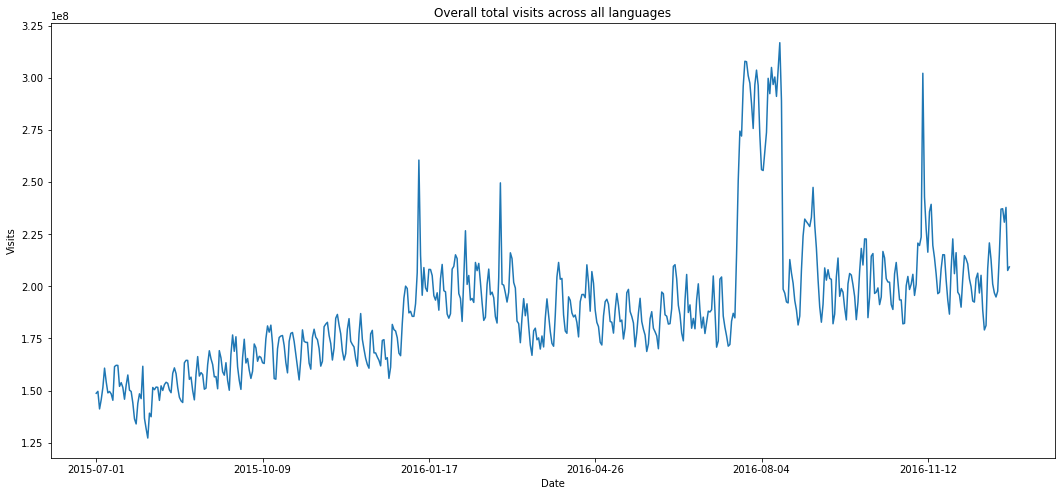

In [31]:
l_df_sum.sum(axis=1).plot(figsize=(18,8))
plt.title('Overall total visits across all languages')
plt.xlabel('Date')
plt.ylabel('Visits')

In [35]:
l_df_sum['Exog'] = pd.read_csv('https://raw.githubusercontent.com/atomikkus/time_series/main/Exog_Campaign_eng')['Exog'].to_list()

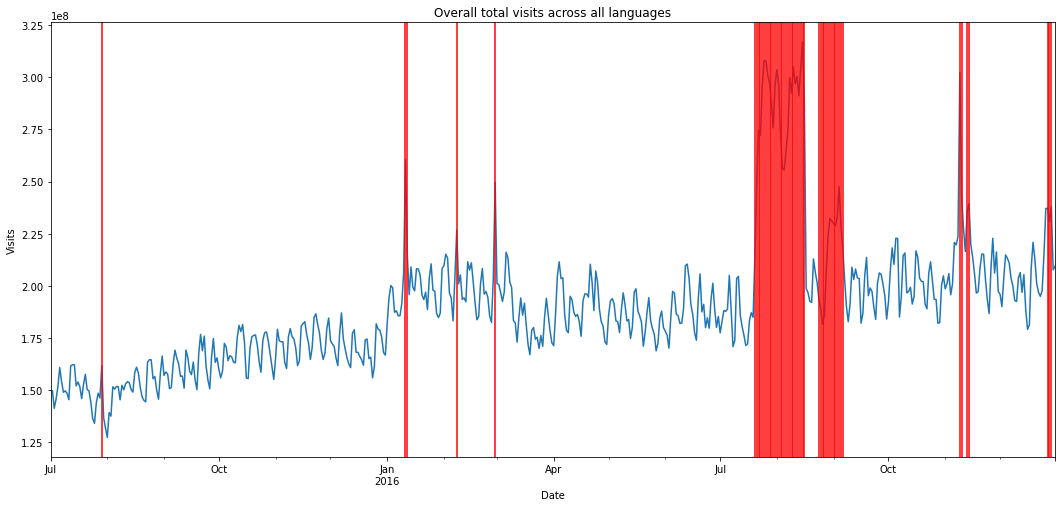

In [72]:
import matplotlib.pyplot as plt

# Ensure the index is in datetime format
l_df_sum.index = pd.to_datetime(l_df_sum.index)

# Sum the values across all columns
l_df_sum.sum(axis=1).plot(figsize=(18, 8))
plt.title('Overall total visits across all languages')
plt.xlabel('Date')
plt.ylabel('Visits')

# Iterate over the DataFrame to add vertical lines for 'Exog' == 1.0
for i in l_df_sum.index:
    if l_df_sum.at[i, 'Exog'] == 1:
        plt.axvline(x=i, color='r')

plt.show()

['2015-07-29',
 '2016-01-11',
 '2016-01-12',
 '2016-02-08',
 '2016-02-29',
 '2016-07-20',
 '2016-07-21',
 '2016-07-22',
 '2016-07-23',
 '2016-07-24',
 '2016-07-25',
 '2016-07-26',
 '2016-07-27',
 '2016-07-28',
 '2016-07-29',
 '2016-07-30',
 '2016-07-31',
 '2016-08-01',
 '2016-08-02',
 '2016-08-03',
 '2016-08-04',
 '2016-08-05',
 '2016-08-06',
 '2016-08-07',
 '2016-08-08',
 '2016-08-09',
 '2016-08-10',
 '2016-08-11',
 '2016-08-12',
 '2016-08-13',
 '2016-08-14',
 '2016-08-15',
 '2016-08-16',
 '2016-08-24',
 '2016-08-25',
 '2016-08-26',
 '2016-08-27',
 '2016-08-28',
 '2016-08-29',
 '2016-08-30',
 '2016-08-31',
 '2016-09-01',
 '2016-09-02',
 '2016-09-03',
 '2016-09-04',
 '2016-09-05',
 '2016-09-06',
 '2016-11-09',
 '2016-11-10',
 '2016-11-13',
 '2016-11-14',
 '2016-12-27',
 '2016-12-28',
 '2016-12-29']